ASSIGNMENT 4 - BRINDHA 2019115027

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


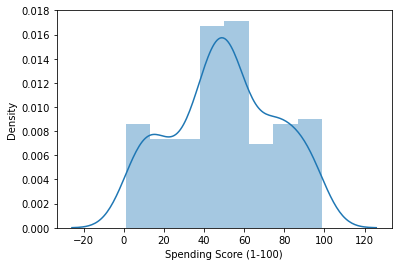

In [5]:
sns.distplot(df['Spending Score (1-100)'])

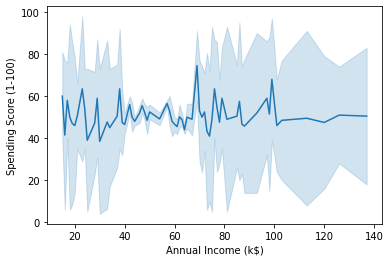

In [6]:
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

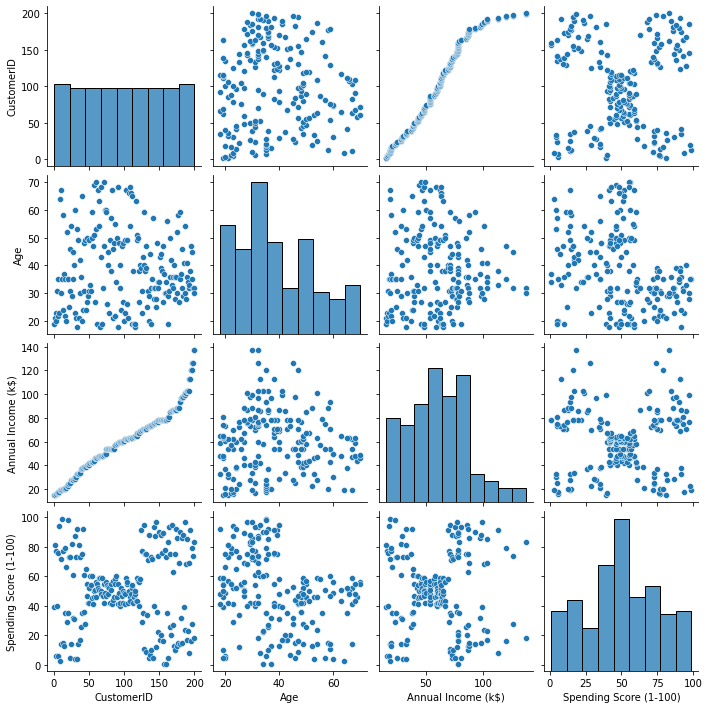

In [7]:
sns.pairplot(df)

B0 =  60.05438359054739
B1 =  0.01007204002893659
STD ERROR :  0.07227755201080979
Linear Regression model between annual income and spending score 



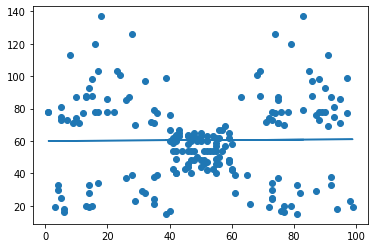

In [8]:
from scipy import stats
x = df['Spending Score (1-100)'].values
y = df['Annual Income (k$)'].values

slope, intercept, r, p, std_err = stats.linregress(x, y)
print("B0 = ",intercept)
print("B1 = ",slope)
print("STD ERROR : ",std_err)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
print("Linear Regression model between annual income and spending score \n")
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [9]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


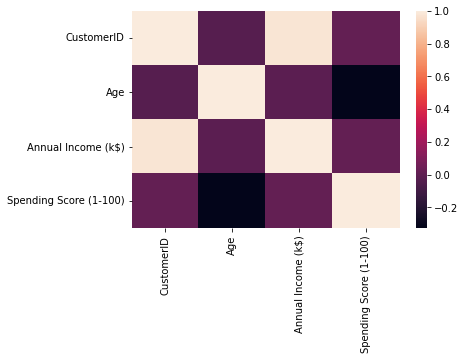

In [10]:
sns.heatmap(df.corr())

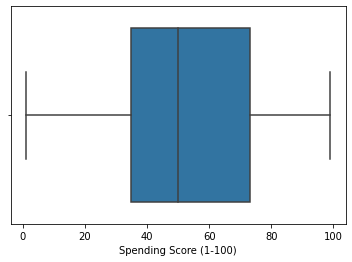

In [11]:
sns.boxplot(df['Spending Score (1-100)'])

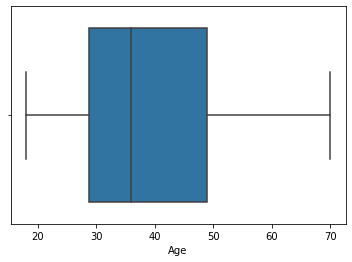

In [12]:
sns.boxplot(df['Age'])

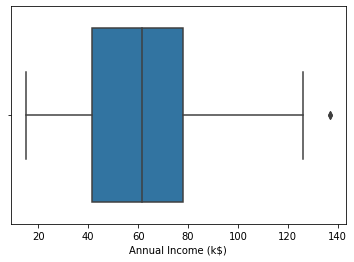

In [13]:
sns.boxplot(df['Annual Income (k$)'])

In [14]:
df['Annual Income (k$)'].median()

61.5

In [16]:
Q1= df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
upper_limit =Q3 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper_limit,30,df['Annual Income (k$)']) #median 61.5

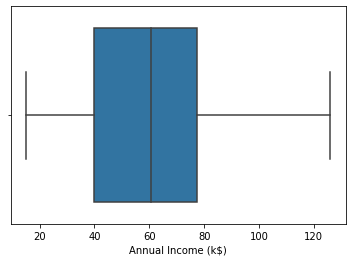

In [17]:
sns.boxplot(df['Annual Income (k$)'])

In [18]:
textualColumns = [x for x in df.columns if df[x].dtype == np.dtype('O')]
print(textualColumns)

['Gender']


In [19]:
from sklearn.preprocessing import LabelEncoder
lbEnc=LabelEncoder()
df['Gender'] = lbEnc.fit_transform(df['Gender'])

In [20]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [21]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [22]:
X = df.iloc[:,3:]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [23]:
scale_x = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scale_x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )

In [26]:
#NUMBER OF CLUSTERS
kmeans.n_clusters

5

In [27]:
y_kmeans = kmeans.fit_predict(X)

In [28]:
y_kmeans


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       3, 4], dtype=int32)

In [29]:
df['cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [30]:
X = df.iloc[:, [3,4]].values
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

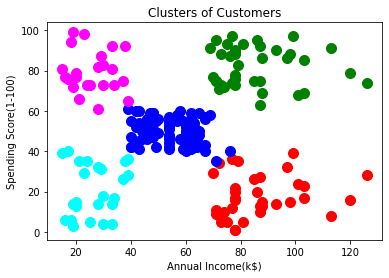

In [31]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()